# Air Passenger

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA

# import air passengers dataset and check its information
air_passenger_df = pd.read_csv('AirPassengers.csv')
air_passenger_df['Month'] = pd.to_datetime(air_passenger_df['Month'], format='%Y%m', errors='ignore')
print(air_passenger_df)
air_passenger_df.describe()

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


<Figure size 1440x504 with 0 Axes>

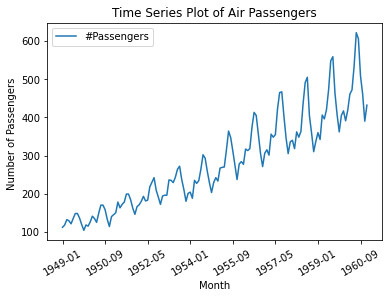

In [46]:
#Time Series Plot for air passenger

#plt.plot(air_passenger_df['#Passengers'])
#plt.plot(air_passenger_df['Month'],air_passenger_df['#Passengers'])
air_passenger_df.plot('Month','#Passengers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers ')
plt.title('Time Series Plot of Air Passengers')
plt.xticks(rotation = 30)
plt.show()

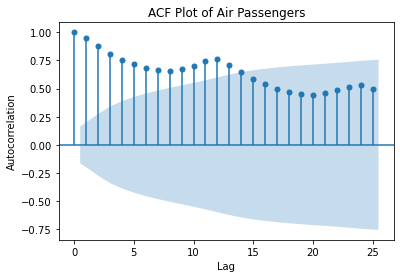

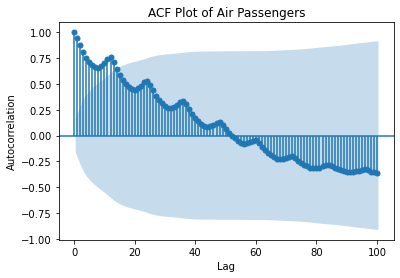

In [15]:
import statsmodels.graphics.tsaplots as st

# ACF Plot for air passengers - 25
st.plot_acf(air_passenger_df['#Passengers'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Air Passengers')
plt.show()

# ACF Plot for air passengers - 100
st.plot_acf(air_passenger_df['#Passengers'], lags = 100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Air Passengers')
plt.show()

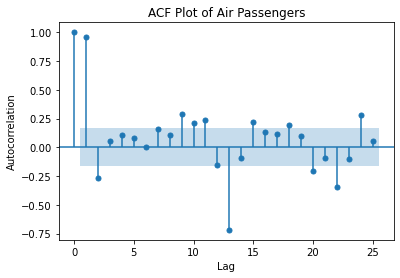

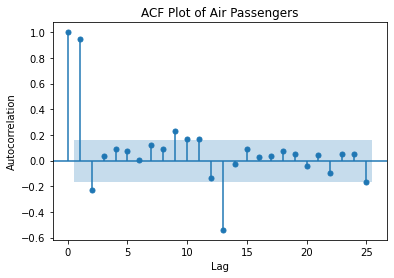

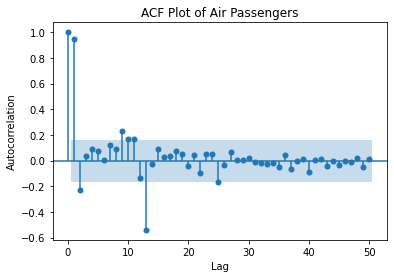

In [23]:
# PACF Plot for air passengers - 25
st.plot_pacf(air_passenger_df['#Passengers'], lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Air Passengers')
plt.show()

# PACF Plot for air passengers - 25 ywmle
st.plot_pacf(air_passenger_df['#Passengers'], method='ywmle', lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Air Passengers')
plt.show()

# PACF Plot for air passengers - 100 ywmle
st.plot_pacf(air_passenger_df['#Passengers'], method='ywmle', lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Air Passengers')
plt.show()

In [59]:
# Develop an IMA(1,1) model for the data
# model = ARIMA(m1_df.Measurement, order=(0,1,1))
# model_fit = model.fit()

# Find the best ARIMA model for air passenger dataset
# Set range of p,d from 0 to 3 and d from 0 to 2. Will try more later. 
import warnings
warnings.filterwarnings("ignore")

plist=[0,1,2,3]
dlist=[0,1,2]
qlist=[0,1,2,3]
pdq=[]
aic=[]
bic=[]
for p in plist:
    for d in dlist:
        for q in qlist:
            try: 
                best_model=ARIMA(air_passenger_df['#Passengers'], order=(p, d, q))
                best_model_fit=best_model.fit(disp=False)
                pdq.append([p,d,q])
                aic.append(best_model_fit.aic)
                bic.append(best_model_fit.bic)
            except:
                continue

min_aic = min(aic)
min_bic = min(bic)
index_aic = aic.index(min_aic)
index_bic = bic.index(min_bic)

print('The smallest AIC is ',min_aic)  
print('The smallest BIC is ',min_bic)  
print('According to AIC, the best choice of parameters [p,d,q] is ',pdq[index_aic])
print('According to BIC, the best choice of parameters [p,d,q] is ',pdq[index_bic])

# summary of fit model
#print(best_model_fit.summary())

The smallest AIC is  1336.775615614814
The smallest BIC is  1360.478372656893
According to AIC, the best choice of parameters [p,d,q] is  [3, 1, 3]
According to BIC, the best choice of parameters [p,d,q] is  [3, 1, 3]


# Bike

In [115]:
# import bike sharing demand dataset and check its information 
bike_test_df = pd.read_csv('bike_test.csv') 
bike_train_df = pd.read_csv('bike_train.csv')
bike_test_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [116]:
bike_test_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [51]:
bike_train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [117]:
bike_train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [101]:
# Bike dataset after integration: group by day
bike_df = pd.read_csv('bike_groupby_day.csv')
bike_df

,date,count
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
451,2012-12-15,5047
452,2012-12-16,3786
453,2012-12-17,4585
454,2012-12-18,5557


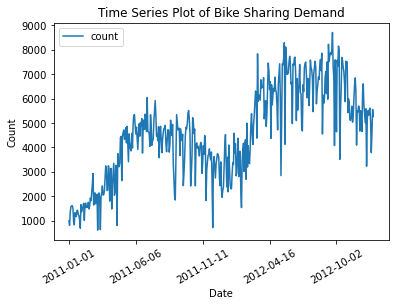

In [103]:
#Time Series Plot for bike sharing demand
bike_df.plot('date','count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Time Series Plot of Bike Sharing Demand')
plt.xticks(rotation = 30)
plt.show()

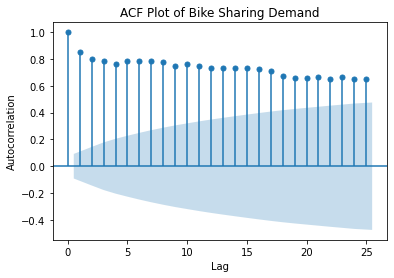

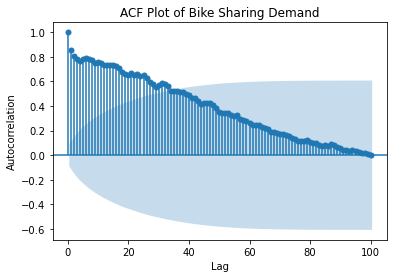

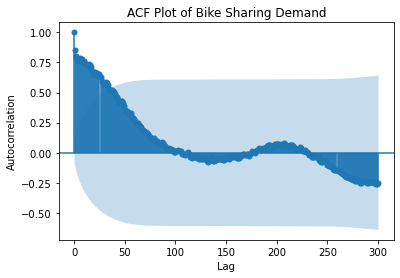

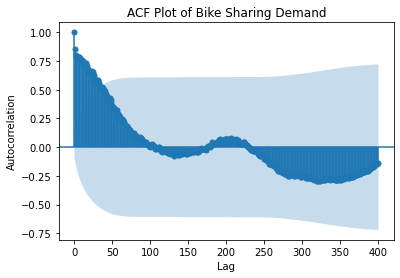

In [106]:
# ACF Plot for bike - 25
st.plot_acf(bike_df['count'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Bike Sharing Demand')
plt.show()

# ACF Plot for bike - 100
st.plot_acf(bike_df['count'], lags = 100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Bike Sharing Demand')
plt.show()

# ACF Plot for bike - 400
st.plot_acf(bike_df['count'], lags = 400)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Bike Sharing Demand')
plt.show()

In [107]:
# Find the best ARIMA model for bike dataset
# Set range of p,d from 0 to 3 and d from 0 to 2. Will try more later. 

plist=[0,1,2,3]
dlist=[0,1,2]
qlist=[0,1,2,3]
pdq=[]
aic=[]
bic=[]
for p in plist:
    for d in dlist:
        for q in qlist:
            try: 
                best_model=ARIMA(bike_df['count'], order=(p, d, q))
                best_model_fit=best_model.fit(disp=False)
                pdq.append([p,d,q])
                aic.append(best_model_fit.aic)
                bic.append(best_model_fit.bic)
            except:
                continue

min_aic = min(aic)
min_bic = min(bic)
index_aic = aic.index(min_aic)
index_bic = bic.index(min_bic)

print('The smallest AIC is ',min_aic)  
print('The smallest BIC is ',min_bic)  
print('According to AIC, the best choice of parameters [p,d,q] is ',pdq[index_aic])
print('According to BIC, the best choice of parameters [p,d,q] is ',pdq[index_bic])

The smallest AIC is  7424.560776962548
The smallest BIC is  7445.151262952754
According to AIC, the best choice of parameters [p,d,q] is  [0, 2, 3]
According to BIC, the best choice of parameters [p,d,q] is  [0, 2, 3]


# Electric Production

In [4]:
electric_production_df = pd.read_csv('Electric_Production.csv') 
electric_production_df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


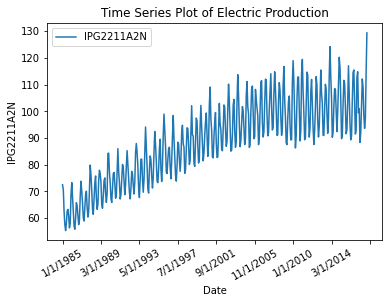

In [61]:
#Time Series Plot for electric production
electric_production_df.plot('DATE','IPG2211A2N')
plt.xlabel('Date')
plt.ylabel('IPG2211A2N')
plt.title('Time Series Plot of Electric Production')
plt.xticks(rotation = 30)
plt.show()

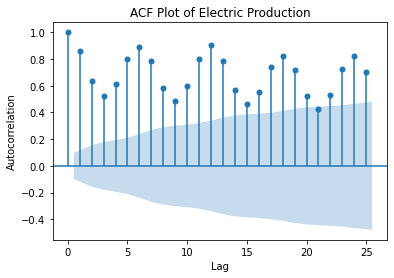

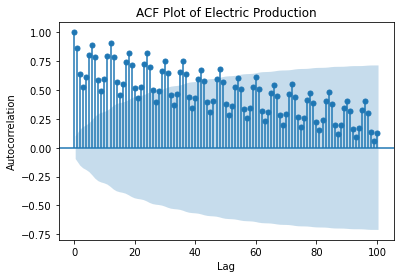

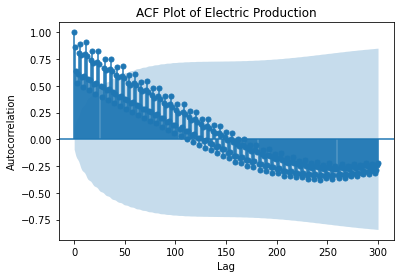

In [64]:
# ACF Plot for electric - 25
st.plot_acf(electric_production_df['IPG2211A2N'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Electric Production')
plt.show()

# ACF Plot for electric - 100
st.plot_acf(electric_production_df['IPG2211A2N'], lags = 100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Electric Production')
plt.show()

# ACF Plot for electric - 300
st.plot_acf(electric_production_df['IPG2211A2N'], lags = 300)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Electric Production')
plt.show()

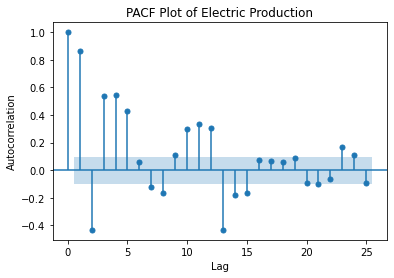

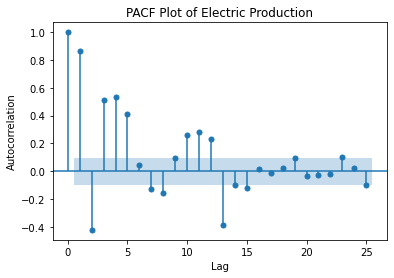

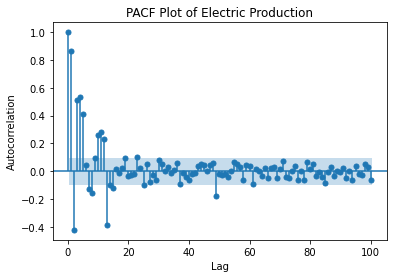

In [67]:
# PACF Plot for Electric Production - 25
st.plot_pacf(electric_production_df['IPG2211A2N'], lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Electric Production')
plt.show()

# PACF Plot for Electric Production - 25  method='ywmle'
st.plot_pacf(electric_production_df['IPG2211A2N'],  method='ywmle', lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Electric Production')
plt.show()

# PACF Plot for Electric Production - 300
st.plot_pacf(electric_production_df['IPG2211A2N'],  method='ywmle', lags=100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Electric Production')
plt.show()

In [68]:
# Find the best ARIMA model for electirc dataset
# Set range of p,d from 0 to 3 and d from 0 to 2. Will try more later. 

plist=[0,1,2,3]
dlist=[0,1,2]
qlist=[0,1,2,3]
pdq=[]
aic=[]
bic=[]
for p in plist:
    for d in dlist:
        for q in qlist:
            try: 
                best_model=ARIMA(electric_production_df['IPG2211A2N'], order=(p, d, q))
                best_model_fit=best_model.fit(disp=False)
                pdq.append([p,d,q])
                aic.append(best_model_fit.aic)
                bic.append(best_model_fit.bic)
            except:
                continue

# use AIC or BIC as evaluation criteria. 
# Find the smallest AIC or BIC, and then find the corresponding combination of p,d,q of the smallest AIC or BIC as the best parameter combination.
min_aic = min(aic)
min_bic = min(bic)
index_aic = aic.index(min_aic)
index_bic = bic.index(min_bic)

print('The smallest AIC is ',min_aic)  
print('The smallest BIC is ',min_bic)  
print('According to AIC, the best choice of parameters [p,d,q] is ',pdq[index_aic])
print('According to BIC, the best choice of parameters [p,d,q] is ',pdq[index_bic])


The smallest AIC is  2114.2875716981343
The smallest BIC is  2142.157471176916
According to AIC, the best choice of parameters [p,d,q] is  [2, 1, 3]
According to BIC, the best choice of parameters [p,d,q] is  [2, 1, 3]


# Artificial Sin

In [92]:
sin_df = pd.read_csv('artifical.csv')
sin_df

,date,sin
0,2018-01-01,100.62
1,2018-01-02,102.34
2,2018-01-03,104.06
3,2018-01-04,105.78
4,2018-01-05,107.49
...,...,...
1151,2021-02-25,181.75
1152,2021-02-26,182.73
1153,2021-02-27,183.68
1154,2021-02-28,184.61


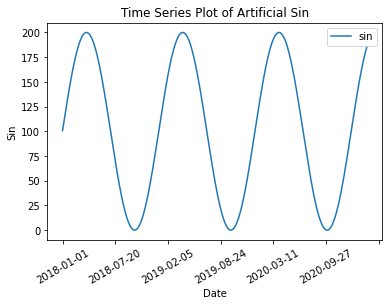

In [95]:
#Time Series Plot for sin
sin_df.plot('date','sin')
plt.xlabel('Date')
plt.ylabel('Sin')
plt.title('Time Series Plot of Artificial Sin')
plt.xticks(rotation = 30)
plt.show()

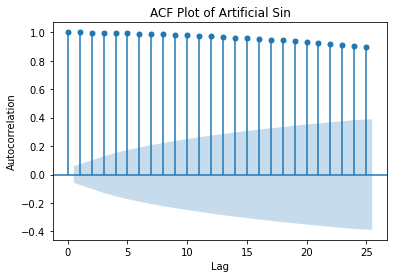

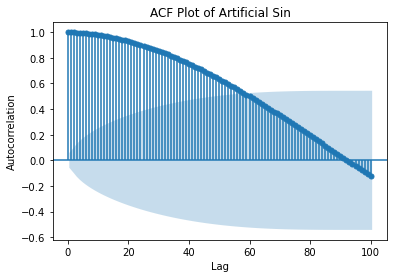

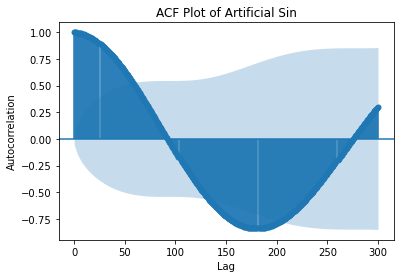

In [97]:
# ACF Plot for sin - 25
st.plot_acf(sin_df['sin'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Artificial Sin')
plt.show()

# ACF Plot for sin - 100
st.plot_acf(sin_df['sin'], lags = 100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Artificial Sin')
plt.show()

# ACF Plot for sin - 300
st.plot_acf(sin_df['sin'], lags = 300)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Artificial Sin')
plt.show()

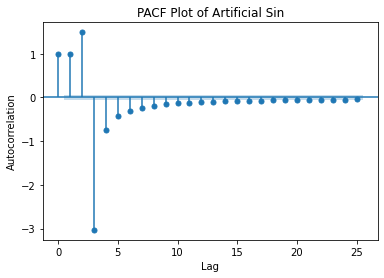

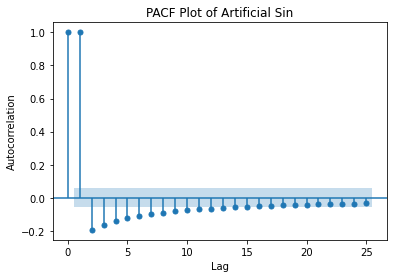

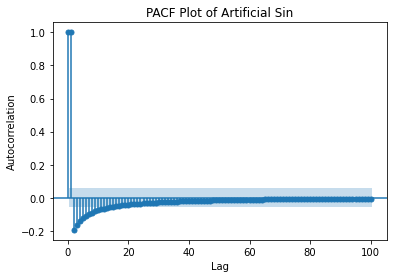

In [99]:
# PACF Plot for sin - 25
st.plot_pacf(sin_df['sin'], lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Artificial Sin')
plt.show()

# PACF Plot for Electric Production - 25  method='ywmle'
st.plot_pacf(sin_df['sin'],  method='ywmle', lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Artificial Sin')
plt.show()

# PACF Plot for Electric Production - 100
st.plot_pacf(sin_df['sin'],  method='ywmle', lags=100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Artificial Sin')
plt.show()

In [100]:
# Find the best ARIMA model for sin dataset
# Set range of p,d from 0 to 3 and d from 0 to 2. Will try more later. 

plist=[0,1,2,3]
dlist=[0,1,2]
qlist=[0,1,2,3]
pdq=[]
aic=[]
bic=[]
for p in plist:
    for d in dlist:
        for q in qlist:
            try: 
                best_model=ARIMA(sin_df['sin'], order=(p, d, q))
                best_model_fit=best_model.fit(disp=False)
                pdq.append([p,d,q])
                aic.append(best_model_fit.aic)
                bic.append(best_model_fit.bic)
            except:
                continue

# use AIC or BIC as evaluation criteria. 
# Find the smallest AIC or BIC, and then find the corresponding combination of p,d,q of the smallest AIC or BIC as the best parameter combination.
min_aic = min(aic)
min_bic = min(bic)
index_aic = aic.index(min_aic)
index_bic = bic.index(min_bic)

print('The smallest AIC is ',min_aic)  
print('The smallest BIC is ',min_bic)  
print('According to AIC, the best choice of parameters [p,d,q] is ',pdq[index_aic])
print('According to BIC, the best choice of parameters [p,d,q] is ',pdq[index_bic])

The smallest AIC is  -9823.769500373799
The smallest BIC is  -9788.406511013107
According to AIC, the best choice of parameters [p,d,q] is  [2, 1, 3]
According to BIC, the best choice of parameters [p,d,q] is  [2, 1, 3]


# Artificial Cos

In [93]:
cos_df = pd.read_csv('artifical_cosine.csv')
cos_df

,date,cos
0,2018-01-01,200.00
1,2018-01-02,199.97
2,2018-01-03,199.92
3,2018-01-04,199.83
4,2018-01-05,199.72
...,...,...
1151,2021-02-25,157.59
1152,2021-02-26,156.18
1153,2021-02-27,154.75
1154,2021-02-28,153.30


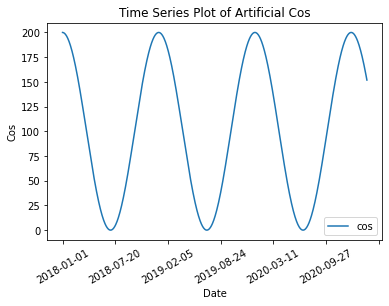

In [96]:
#Time Series Plot for electric production
cos_df.plot('date','cos')
plt.xlabel('Date')
plt.ylabel('Cos')
plt.title('Time Series Plot of Artificial Cos')
plt.xticks(rotation = 30)
plt.show()

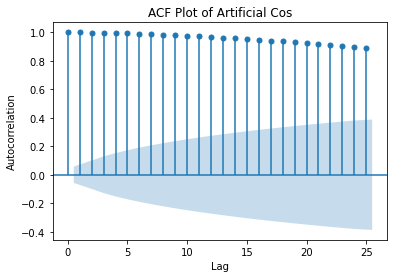

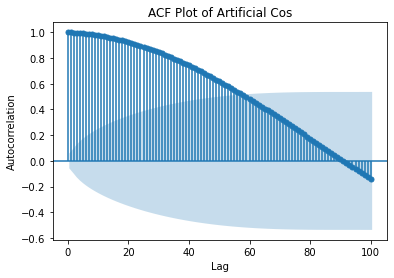

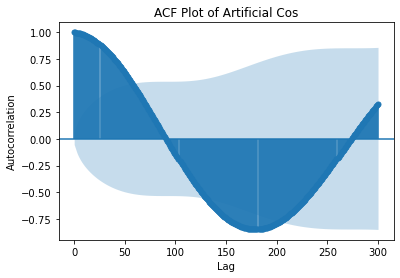

In [98]:
# ACF Plot for cos - 25
st.plot_acf(cos_df['cos'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Artificial Cos')
plt.show()

# ACF Plot for cos - 100
st.plot_acf(cos_df['cos'], lags = 100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Artificial Cos')
plt.show()

# ACF Plot for cos - 300
st.plot_acf(cos_df['cos'], lags = 300)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Artificial Cos')
plt.show()

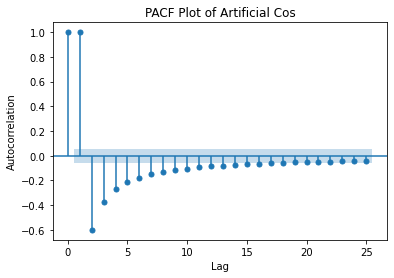

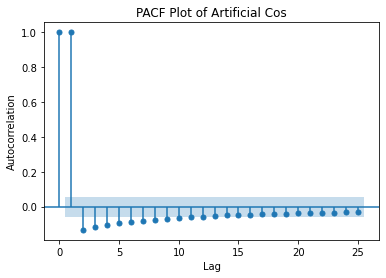

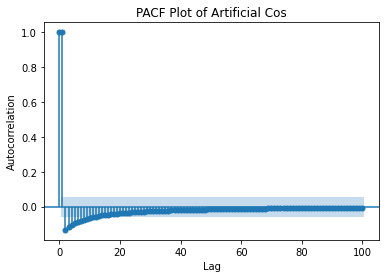

In [108]:
# PACF Plot for cos - 25
st.plot_pacf(cos_df['cos'], lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Artificial Cos')
plt.show()

# PACF Plot for cos - 25  method='ywmle'
st.plot_pacf(cos_df['cos'],  method='ywmle', lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Artificial Cos')
plt.show()

# PACF Plot for cos - 100 method='ywmle'
st.plot_pacf(cos_df['cos'],  method='ywmle', lags=100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Artificial Cos')
plt.show()

In [112]:
# Find the best ARIMA model for cos dataset
# Set range of p,d from 0 to 3 and d from 0 to 2. Will try more later. 

plist=[0,1,2,3]
dlist=[0,1,2]
qlist=[0,1,2,3]
pdq=[]
aic=[]
bic=[]
for p in plist:
    for d in dlist:
        for q in qlist:
            try: 
                best_model=ARIMA(cos_df['cos'], order=(p, d, q))
                best_model_fit=best_model.fit(disp=False)
                pdq.append([p,d,q])
                aic.append(best_model_fit.aic)
                bic.append(best_model_fit.bic)
            except:
                continue

# use AIC or BIC as evaluation criteria. 
# Find the smallest AIC or BIC, and then find the corresponding combination of p,d,q of the smallest AIC or BIC as the best parameter combination.                
min_aic = min(aic)
min_bic = min(bic)
index_aic = aic.index(min_aic)
index_bic = bic.index(min_bic)

print('The smallest AIC is ',min_aic)  
print('The smallest BIC is ',min_bic)  
print('According to AIC, the best choice of parameters [p,d,q] is ',pdq[index_aic])
print('According to BIC, the best choice of parameters [p,d,q] is ',pdq[index_bic])

The smallest AIC is  -8892.207808961979
The smallest BIC is  -8856.850882832503
According to AIC, the best choice of parameters [p,d,q] is  [2, 2, 3]
According to BIC, the best choice of parameters [p,d,q] is  [2, 2, 3]
